# Task 3 – News Sentiment vs Stock Price Movements

This notebook:
- Computes sentiment scores from news headlines
- Aggregates sentiment by day
- Computes daily stock returns
- Merges sentiment with returns
- Calculates correlation and visualizes the relationship


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

plt.style.use("default")


In [5]:
NEWS_PATH = "../../newsData/raw_analyst_ratings.csv"
PRICE_PATH = "../../yfinance_data/Data/AAPL.csv"

df_news = pd.read_csv(NEWS_PATH)
df_price = pd.read_csv(PRICE_PATH)

df_news.head(), df_price.head()


(   Unnamed: 0                                           headline  \
 0           0            Stocks That Hit 52-Week Highs On Friday   
 1           1         Stocks That Hit 52-Week Highs On Wednesday   
 2           2                      71 Biggest Movers From Friday   
 3           3       46 Stocks Moving In Friday's Mid-Day Session   
 4           4  B of A Securities Maintains Neutral on Agilent...   
 
                                                  url          publisher  \
 0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
 1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
 2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
 3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
 4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   
 
                         date stock  
 0  2020-06-05 10:30:54-04:00     A  
 1  2020-06-03 10:45:20-04:00     A  
 2  2020-05-

In [6]:
def get_polarity(text: str) -> float:
    try:
        return TextBlob(str(text)).sentiment.polarity
    except Exception:
        return 0.0

df_news["sentiment"] = df_news["headline"].apply(get_polarity)
df_news[["headline", "sentiment"]].head()


,headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,0.0
2,71 Biggest Movers From Friday,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,0.0
4,B of A Securities Maintains Neutral on Agilent...,0.0


In [9]:
import pandas as pd

NEWS_PATH = "../../newsData/raw_analyst_ratings.csv"
PRICE_PATH = "../../yfinance_data/Data/AAPL.csv"

# Load files
df_news = pd.read_csv(NEWS_PATH)
df_price = pd.read_csv(PRICE_PATH)

# Fix date columns
df_news["date"] = pd.to_datetime(df_news["date"], errors="coerce")
df_price["Date"] = pd.to_datetime(df_price["Date"], errors="coerce")

df_news.head(), df_price.head()


(   Unnamed: 0                                           headline  \
 0           0            Stocks That Hit 52-Week Highs On Friday   
 1           1         Stocks That Hit 52-Week Highs On Wednesday   
 2           2                      71 Biggest Movers From Friday   
 3           3       46 Stocks Moving In Friday's Mid-Day Session   
 4           4  B of A Securities Maintains Neutral on Agilent...   
 
                                                  url          publisher  \
 0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
 1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
 2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
 3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
 4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   
 
                        date stock  
 0 2020-06-05 10:30:54-04:00     A  
 1 2020-06-03 10:45:20-04:00     A  
 2 2020-05-26 0

In [10]:
df_price = df_price.sort_values("Date")
df_price["date"] = df_price["Date"].dt.date

df_price["return"] = df_price["Close"].pct_change()

price_returns = df_price[["date", "Close", "return"]]
price_returns.head()


,date,Close,return
0,2009-01-02,2.721686,NaN
1,2009-01-05,2.836553,0.042204
2,2009-01-06,2.789767,-0.016494
3,2009-01-07,2.729484,-0.021609
4,2009-01-08,2.780169,0.018570


In [13]:
import pandas as pd

# 🔥 FIXED PATHS FOR YOUR FOLDER STRUCTURE
NEWS_PATH = "../../newsData/raw_analyst_ratings.csv"
PRICE_PATH = "../../yfinance_data/Data/AAPL.csv"

# Load data
df_news = pd.read_csv(NEWS_PATH)
df_price = pd.read_csv(PRICE_PATH)

# Convert date columns safely
df_news["date"] = pd.to_datetime(df_news["date"], errors="coerce")
df_price["Date"] = pd.to_datetime(df_price["Date"], errors="coerce")

df_news.head(), df_price.head()


(   Unnamed: 0                                           headline  \
 0           0            Stocks That Hit 52-Week Highs On Friday   
 1           1         Stocks That Hit 52-Week Highs On Wednesday   
 2           2                      71 Biggest Movers From Friday   
 3           3       46 Stocks Moving In Friday's Mid-Day Session   
 4           4  B of A Securities Maintains Neutral on Agilent...   
 
                                                  url          publisher  \
 0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
 1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
 2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
 3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
 4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   
 
                        date stock  
 0 2020-06-05 10:30:54-04:00     A  
 1 2020-06-03 10:45:20-04:00     A  
 2 2020-05-26 0

In [14]:
df_news["date_only"] = df_news["date"].dt.date
df_news.head()


,Unnamed: 0,headline,url,publisher,date,stock,date_only
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22


In [16]:
df_news.columns


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'date_only'],
      dtype='object')

In [17]:
from textblob import TextBlob

# Create sentiment score from headline text
df_news["sentiment"] = df_news["headline"].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)

df_news[["headline", "sentiment"]].head()


,headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,0.0
2,71 Biggest Movers From Friday,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,0.0
4,B of A Securities Maintains Neutral on Agilent...,0.0


In [18]:
daily_sentiment = (
    df_news.groupby("date_only")["sentiment"]
        .mean()
        .reset_index()
        .rename(columns={"date_only": "date"})
)

daily_sentiment.head()


,date,sentiment
0,2011-04-27,0.000000
1,2011-04-28,0.068182
2,2011-04-29,0.166667
3,2011-04-30,0.500000
4,2011-05-01,0.000000


In [19]:
merged = pd.merge(daily_sentiment, price_returns, on="date", how="inner")
merged.head()


,date,sentiment,Close,return
0,2011-04-27,0.000000,10.501366,-0.000770
1,2011-04-28,0.068182,10.399394,-0.009710
2,2011-04-29,0.166667,10.500770,0.009748
3,2011-05-02,-0.009259,10.385298,-0.010997
4,2011-05-03,0.000000,10.442881,0.005545


In [20]:
corr = merged["sentiment"].corr(merged["return"])
print(f"Correlation between daily sentiment and daily returns: {corr:.4f}")


Correlation between daily sentiment and daily returns: -0.0028


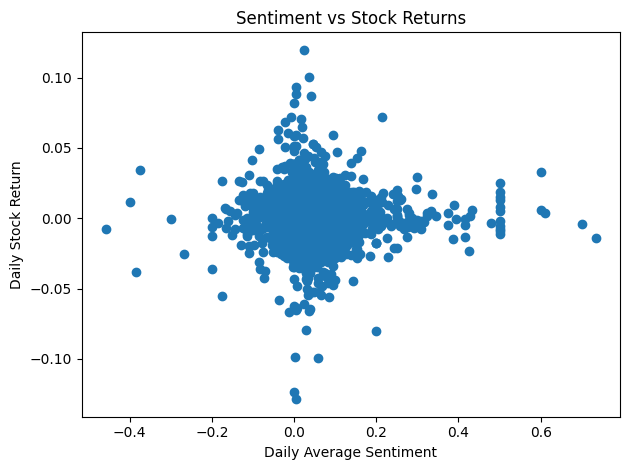

In [21]:
plt.scatter(merged["sentiment"], merged["return"])
plt.xlabel("Daily Average Sentiment")
plt.ylabel("Daily Stock Return")
plt.title("Sentiment vs Stock Returns")
plt.tight_layout()
plt.show()
